In [47]:
import pandas as pd
import numpy as np
import re
from pandas_profiling import ProfileReport
from sklearn.feature_extraction import text
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import neattext as nt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pd.set_option("display.max_rows", 10)
stop = text.ENGLISH_STOP_WORDS
df = pd.read_csv('./train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [48]:
text = df["text"].str.upper()

for i in range(len(text)):
    text[i] = nt.TextFrame(str(text[i])).remove_emails()
    text[i] = nt.TextFrame(str(text[i])).remove_numbers()
    text[i] = nt.TextFrame(str(text[i])).remove_phone_numbers()
    text[i] = nt.TextFrame(str(text[i])).remove_stopwords(lang = "en")
    text[i] = nt.TextFrame(str(text[i])).remove_btc_address()
    text[i] = nt.TextFrame(str(text[i])).remove_urls()
    text[i] = nt.TextFrame(str(text[i])).remove_stopwords(lang = "es")
    text[i] = nt.TextFrame(str(text[i])).remove_emojis()
    text[i] = nt.TextFrame(str(text[i])).remove_html_tags()
    text[i] = nt.TextFrame(str(text[i])).remove_puncts()
    text[i] = nt.TextFrame(str(text[i])).remove_special_characters()


df["text"] = text.astype(str)
df["text"]

0                   DEEDS REASON EARTHQUAKE ALLAH FORGIVE
1                      FOREST FIRE NEAR RONGE SASK CANADA
2       RESIDENTS ASKED SHELTER PLACE NOTIFIED OFFICER...
3        PEOPLE RECEIVE WILDFIRES EVACUATION ORDERS CA...
4       GOT SENT PHOTO RUBY ALASKA SMOKE WILDFIRES POU...
                              ...                        
7608    GIANT CRANES HOLDING BRIDGE COLLAPSE NEARBY HOMES
7609    ARIAAHRARY THETAWNIEST CONTROL WILD FIRES CALI...
7610                              M  UTCKM VOLCANO HAWAII
7611    POLICE INVESTIGATING EBIKE COLLIDED CAR LITTLE...
7612    LATEST HOMES RAZED NORTHERN CALIFORNIA WILDFIR...
Name: text, Length: 7613, dtype: object

In [49]:
# df = df.dropna()
lista = df["keyword"].unique()
for category in lista:
    df_temp = df["text"].loc[df['keyword'] == category]

    frequency_table = df_temp.str.split(expand=True).stack().value_counts()
    print("CATEGORIA =", category, " || PALABRA = ",  frequency_table[0:1].to_string())

CATEGORIA = nan  || PALABRA =  Series([], )
CATEGORIA = ablaze  || PALABRA =  ABLAZE    28
CATEGORIA = accident  || PALABRA =  ACCIDENT    32
CATEGORIA = aftershock  || PALABRA =  AFTERSHOCK    19
CATEGORIA = airplane%20accident  || PALABRA =  ACCIDENT    35
CATEGORIA = ambulance  || PALABRA =  AMBULANCE    36
CATEGORIA = annihilated  || PALABRA =  ANNIHILATED    31
CATEGORIA = annihilation  || PALABRA =  ANNIHILATION    22
CATEGORIA = apocalypse  || PALABRA =  APOCALYPSE    28
CATEGORIA = armageddon  || PALABRA =  ARMAGEDDON    37
CATEGORIA = army  || PALABRA =  ARMY    33
CATEGORIA = arson  || PALABRA =  ARSON    29
CATEGORIA = arsonist  || PALABRA =  ARSONIST    17
CATEGORIA = attack  || PALABRA =  ATTACK    31
CATEGORIA = attacked  || PALABRA =  ATTACKED    35
CATEGORIA = avalanche  || PALABRA =  AVALANCHE    26
CATEGORIA = battle  || PALABRA =  BATTLE    23
CATEGORIA = bioterror  || PALABRA =  FEDEX    34
CATEGORIA = bioterrorism  || PALABRA =  BIOTERRORISM    24
CATEGORIA = blaze

In [50]:
# pd.set_option("display.max_rows", None)
frequency_table = df["text"].str.split(expand=True).stack().apply(lambda x: x if len(x) > 1 and x != 'http' and x != 'https' and x != '//t' else None ).value_counts()
frequency_table

LIKE         345
IM           306
AMP          300
FIRE         252
NEW          226
            ... 
SPECIALS       1
CALESTOUS      1
DEFEATER       1
YEAAHH         1
SYMPTOMS       1
Length: 16716, dtype: int64

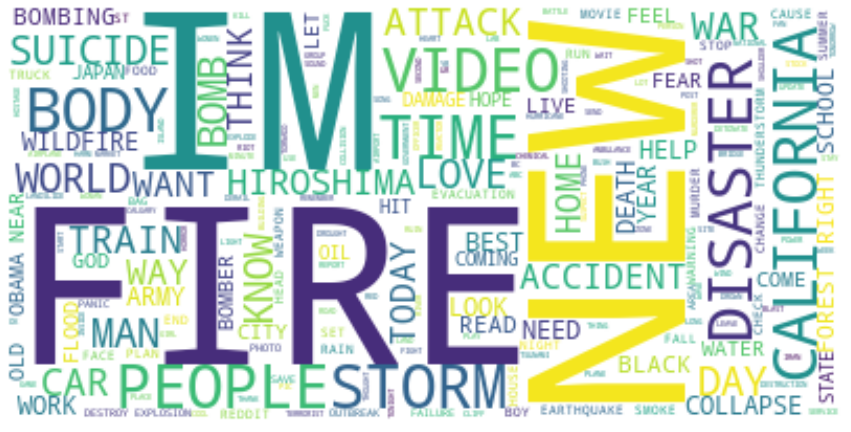

In [51]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(frequency_table.to_string())
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

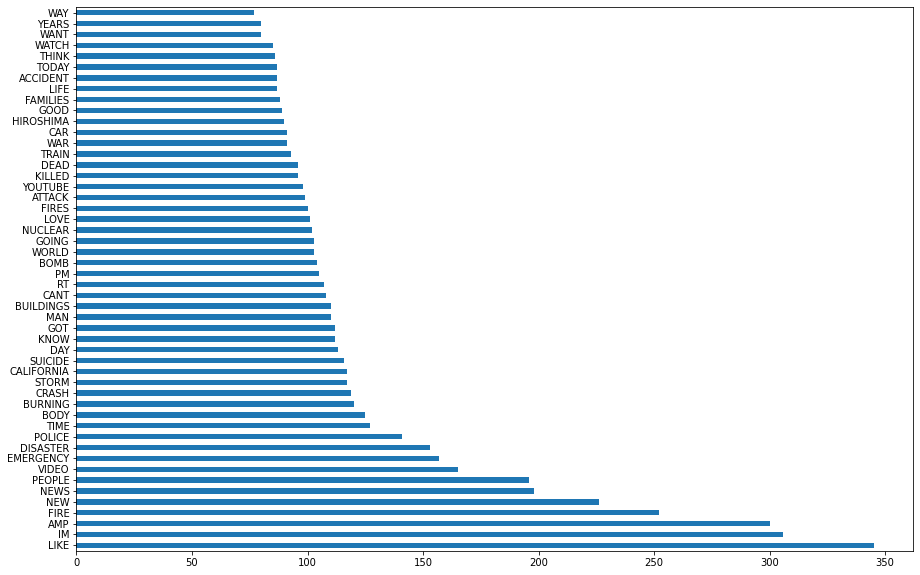

In [52]:
# Me quede en el histograma ademas hay que remover bien esa mierda de los links y esas letras como b o las u's
frequency_table = frequency_table[0:50]
plt.figure( figsize=(15,10))
frequency_table.plot(kind='barh')

In [53]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

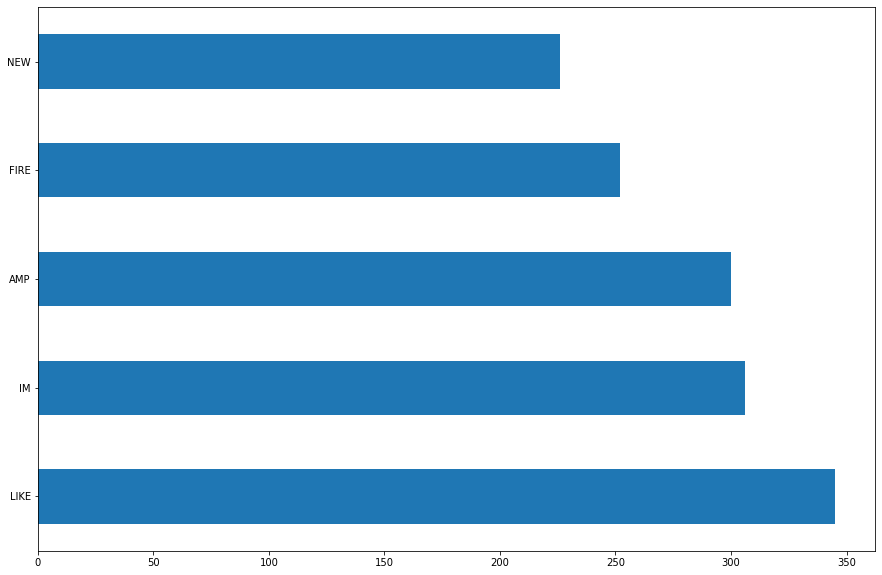

In [54]:
frequency_table = df["text"].str.split(expand=True).stack().apply(lambda x: x if len(x) > 1 and x != 'http' and x != 'https' and x != '//t' else None ).value_counts()

frequency_table = frequency_table[0:5]
plt.figure( figsize=(15,10))
frequency_table.plot(kind='barh')

In [70]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

score = []
scorePolarity = []

for tweet in df['text']:
    scoreObject = sid.polarity_scores(tweet)
    scoreText = scoreObject['compound']

    if scoreText < -0.33:
        scorePolarity.append('negative')
    elif scoreText > 0.33:
        scorePolarity.append('positive')
    else:
        scorePolarity.append('neutral')

    score.append(scoreText)

df['score'] = score
df['polaridad'] = scorePolarity

df.sort_values(by=["score"], ascending=False).head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,keyword,location,text,target,score,polaridad
6992,10028,twister,NaN,CHECK WANT TWISTER TICKETS VIP EXPERIENCE SHAN...,0,0.9682,positive
3163,4541,emergency,"Renfrew, Scotland",BATFANUK ENJOYED TODAY GREAT FUN EMERGENCY NON...,0,0.9423,positive
3382,4844,evacuation,"Renfrew, Scotland",BATFANUK ENJOYED TODAY GREAT FUN EMERGENCY NON...,0,0.9423,positive
6292,8989,storm,NaN,TODAYS STORM PASS LET TOMORROWS LIGHT GREET KI...,1,0.9403,positive
2238,3198,deluge,NaN,MEDITATIONBYMSG PPL GOT METHOD MEDITATION UP A...,0,0.9287,positive
6295,8994,stretcher,NaN,FREE EBAY SNIPING RT LUMBAR EXTENDER STRETCHER...,0,0.9260,positive
6560,9386,survived,Puerto Rico,DUCHOVBUTT STARBUCKSCULLY MADMAKNY DAVIDDUCHOV...,0,0.9217,positive
1856,2668,crush,"San Diego, Texas.",LOVE LOVE LOVE REMEMBER CRUSH,0,0.9186,positive
1909,2744,crushed,Trinidad & Tobago,DISILLUSIONED LEAD CHARACTER CHECK HAPPY LUCKY...,0,0.9136,positive
5033,7176,mudslide,London,IMPRESSIONS GLAD HAT MAN LEAVING LIEU INTEREST...,0,0.9100,positive


In [56]:
# NEGATIVOS

df.sort_values(by=["score"]).head(10)

,id,keyword,location,text,target,score,polaridad
7472,10689,wreck,NaN,WRECK WRECK WRECK WRECK WRECK WRECK WRECK WREC...,0,-0.9879,negative
6414,9172,suicide%20bomber,NaN,ABUBARAA SUICIDE BOMBER TARGETS SAUDI MOSQUE D...,1,-0.9686,negative
6411,9166,suicide%20bomber,NaN,SUICIDE BOMBER KILLS SAUDI SECURITY SITE MOSQU...,1,-0.9623,negative
6393,9137,suicide%20bomb,Worldwide,TH DAY JUL NIGERIA SUICIDE BOMB ATTACKS KILL...,1,-0.9595,negative
6407,9159,suicide%20bomber,Worldwide,KILLED SARABIA MOSQUE SUICIDE BOMBING SUICIDE ...,1,-0.9552,negative
472,682,attack,"portland, oregon",ILLEGAL ALIEN RELEASED OBAMADHS TIMES CHARGED ...,1,-0.9538,negative
1540,2225,chemical%20emergency,"Las Vegas, Nevada",BOMB CRASH LOOT RIOT EMERGENCY PIPE BOMB NUCLE...,1,-0.9524,negative
6930,9940,trouble,NaN,CSPAN PREZ MR PRESIDENT BIGGEST TERRORIST TROU...,1,-0.9493,negative
2932,4213,drowned,Pembroke NH,LAKE SEES DEAD FISH ME POOR LITTLE GUY WONDER ...,0,-0.9477,negative
6438,9211,suicide%20bombing,NaN,REMEMBERING REBECCA ROGA PHILIPPINES MURDERED ...,1,-0.9451,negative


In [57]:
# POSITIVOS


df.sort_values(by=["score"], ascending=False).head(10)

,id,keyword,location,text,target,score,polaridad
6992,10028,twister,NaN,CHECK WANT TWISTER TICKETS VIP EXPERIENCE SHAN...,0,0.9682,positive
3163,4541,emergency,"Renfrew, Scotland",BATFANUK ENJOYED TODAY GREAT FUN EMERGENCY NON...,0,0.9423,positive
3382,4844,evacuation,"Renfrew, Scotland",BATFANUK ENJOYED TODAY GREAT FUN EMERGENCY NON...,0,0.9423,positive
6292,8989,storm,NaN,TODAYS STORM PASS LET TOMORROWS LIGHT GREET KI...,1,0.9403,positive
2238,3198,deluge,NaN,MEDITATIONBYMSG PPL GOT METHOD MEDITATION UP A...,0,0.9287,positive
6295,8994,stretcher,NaN,FREE EBAY SNIPING RT LUMBAR EXTENDER STRETCHER...,0,0.9260,positive
6560,9386,survived,Puerto Rico,DUCHOVBUTT STARBUCKSCULLY MADMAKNY DAVIDDUCHOV...,0,0.9217,positive
1856,2668,crush,"San Diego, Texas.",LOVE LOVE LOVE REMEMBER CRUSH,0,0.9186,positive
1909,2744,crushed,Trinidad & Tobago,DISILLUSIONED LEAD CHARACTER CHECK HAPPY LUCKY...,0,0.9136,positive
5033,7176,mudslide,London,IMPRESSIONS GLAD HAT MAN LEAVING LIEU INTEREST...,0,0.9100,positive


In [58]:
from nltk import word_tokenize 
nltk.download(['stopwords', 'punkt', 'names', 'vader_lexicon'] )
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

corpus = []
for tweet in df['text']:
    words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
    corpus.append(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:


embedding_dict={}
with open('./glove.6B.100d.txt','r', encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()



In [60]:


MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')



In [61]:


word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))



Number of unique words: 16740


In [62]:


num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in word_index.items():
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec



In [63]:


from cProfile import run


model=Sequential()
embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix), input_length=MAX_LEN,trainable=False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
optimzer=Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'], run_eagerly=True)



In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           1674100   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 50, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,716,405
Trainable params: 42,305
Non-trainable params: 1,674,100
_________________________________________________________________


In [65]:
train=tweet_pad[:df.shape[0]]
test=tweet_pad[df.shape[0]:]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(train, df['target'].values, test_size=0.15)
X_train.shape, X_test.shape

((6471, 50), (1142, 50))

In [67]:
history = model.fit(X_train, y_train, batch_size=4, epochs=5, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
1618/1618 - 507s - loss: 0.6914 - accuracy: 0.5695 - val_loss: 0.6889 - val_accuracy: 0.5718 - 507s/epoch - 313ms/step
Epoch 2/5
1618/1618 - 518s - loss: 0.6653 - accuracy: 0.5883 - val_loss: 0.5924 - val_accuracy: 0.7110 - 518s/epoch - 320ms/step
Epoch 3/5
1618/1618 - 514s - loss: 0.6009 - accuracy: 0.6999 - val_loss: 0.5372 - val_accuracy: 0.7671 - 514s/epoch - 318ms/step
Epoch 4/5
1618/1618 - 541s - loss: 0.5805 - accuracy: 0.7170 - val_loss: 0.5239 - val_accuracy: 0.7671 - 541s/epoch - 335ms/step
Epoch 5/5
1618/1618 - 521s - loss: 0.5621 - accuracy: 0.7367 - val_loss: 0.5094 - val_accuracy: 0.7776 - 521s/epoch - 322ms/step
